In [ ]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
#Montar Drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# load dataset
csv_path = "/content/gdrive/MyDrive/DataSets/dato 1.csv"
df_train = pd.read_csv(csv_path, sep = ',')

csv_path = "/content/gdrive/MyDrive/DataSets/dato 1.csv"
df_test = pd.read_csv(csv_path, sep = ',')

In [ ]:
# check shape
print(df_train.shape)
print(df_test.shape)

(234001, 12)
(234001, 12)


In [ ]:
# look a first 10 rows of training data
df_train.head(10)

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker_buy_quote_asset_volume,Ignore
0,01/01/2018 00:00,13715.65,13715.65,13400.01,13556.15,123.616013,15:00.0,1.675545e+06,1572,63.227133,8.576108e+05,0
1,01/01/2018 00:15,13533.75,13550.87,13402.00,13521.12,98.136430,30:00.0,1.321757e+06,1461,47.686389,6.422812e+05,0
2,01/01/2018 00:30,13500.00,13545.37,13450.00,13470.41,79.904037,45:00.0,1.078825e+06,1000,43.710406,5.900347e+05,0
3,01/01/2018 00:45,13494.65,13690.87,13450.00,13529.01,141.699719,00:00.0,1.917783e+06,1195,73.897993,1.000614e+06,0
4,01/01/2018 01:00,13528.99,13571.74,13402.28,13445.63,72.537533,15:00.0,9.778198e+05,898,34.257652,4.618369e+05,0
5,01/01/2018 01:15,13469.99,13595.89,13445.63,13560.00,87.861758,30:00.0,1.189941e+06,939,45.135957,6.111437e+05,0
6,01/01/2018 01:30,13559.99,13559.99,13430.00,13440.01,74.368405,45:00.0,1.004038e+06,1047,38.653471,5.219765e+05,0
7,01/01/2018 01:45,13440.01,13440.01,13155.38,13203.06,148.929310,00:00.0,1.982724e+06,1650,62.793323,8.354925e+05,0
8,01/01/2018 02:00,13203.00,13411.76,13202.03,13387.00,108.542470,15:00.0,1.446924e+06,1528,40.703069,5.424858e+05,0
9,01/01/2018 02:15,13387.00,13388.00,13225.00,13225.00,95.186039,30:00.0,1.265431e+06,1079,43.068838,5.726181e+05,0


In [ ]:
# see all the column names
df_train.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker_buy_quote_asset_volume', 'Ignore'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234001 entries, 0 to 234000
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open time                     234001 non-null  object 
 1   Open                          234001 non-null  float64
 2   High                          234001 non-null  float64
 3   Low                           234001 non-null  float64
 4   Close                         234001 non-null  float64
 5   Volume                        234001 non-null  float64
 6   Close time                    234001 non-null  object 
 7   Quote asset volume            234001 non-null  float64
 8   Number of trades              234001 non-null  int64  
 9   Taker buy base asset volume   234001 non-null  float64
 10  Taker_buy_quote_asset_volume  234001 non-null  float64
 11  Ignore                        234001 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory us

In [ ]:
df_train['Taker_buy_quote_asset_volume'].describe()

,Taker_buy_quote_asset_volume
count,2.340010e+05
mean,9.164918e+06
std,1.433521e+07
min,0.000000e+00
25%,1.502405e+06
50%,4.131841e+06
75%,1.123593e+07
max,4.345161e+08


Text(162.25000000000009, 0.5, 'Features')

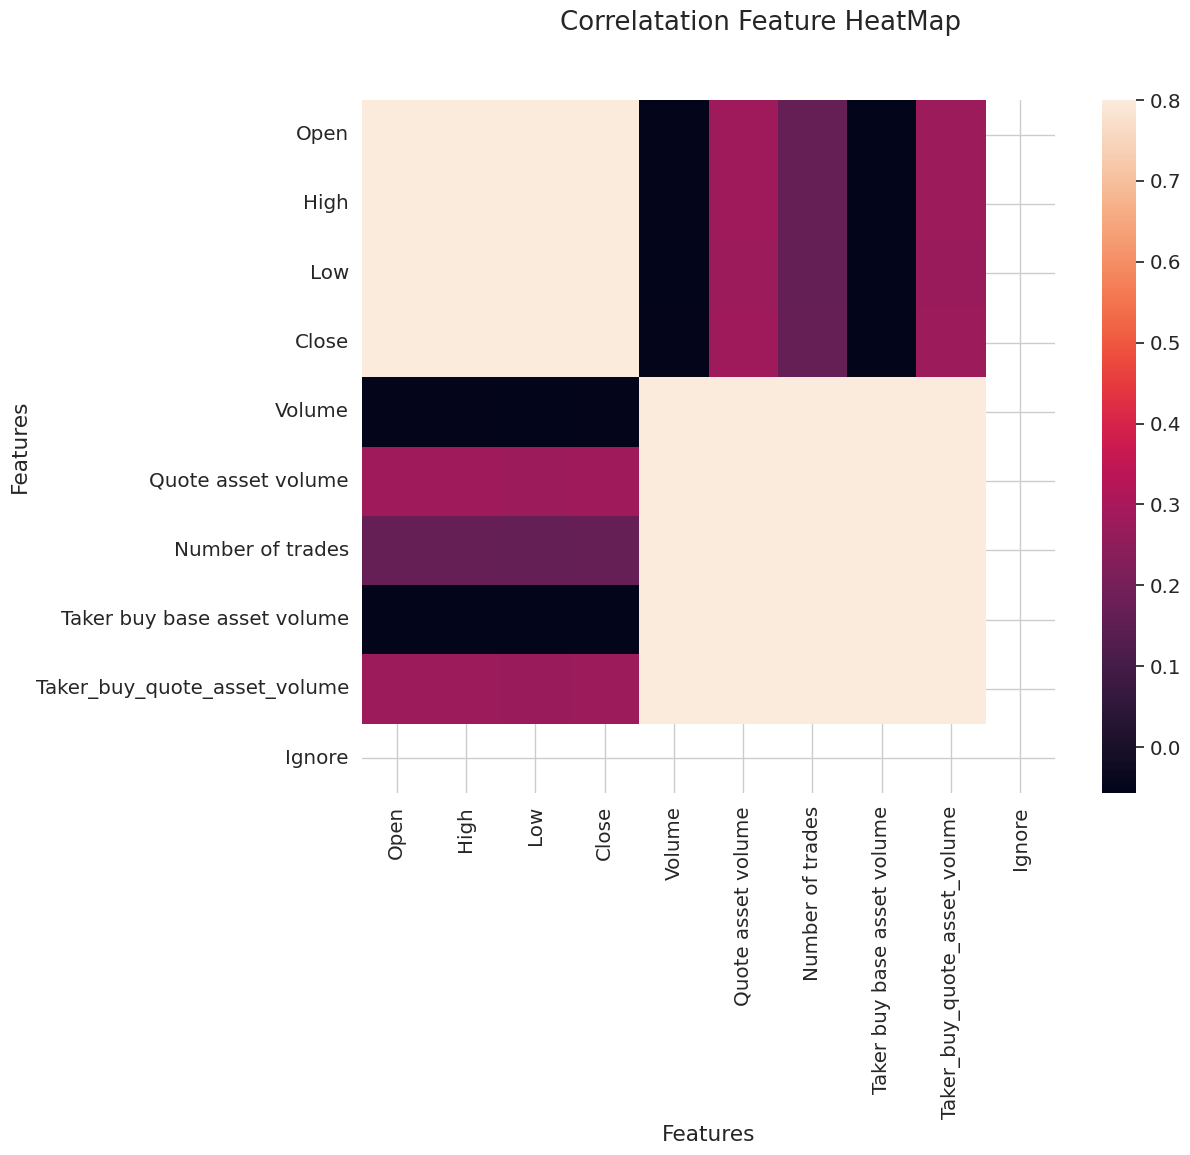

In [ ]:
#correlation matrix
#corr_mat = df_train.corr()
#f, ax = plt.subplots(figsize=(12, 9))

df_train_numeric = df_train.select_dtypes(include=[float, int])
corr_mat = df_train_numeric.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

In [ ]:
df_train_numeric.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker_buy_quote_asset_volume', 'Ignore'],
      dtype='object')

Text(98.74999999999999, 0.5, 'Features')

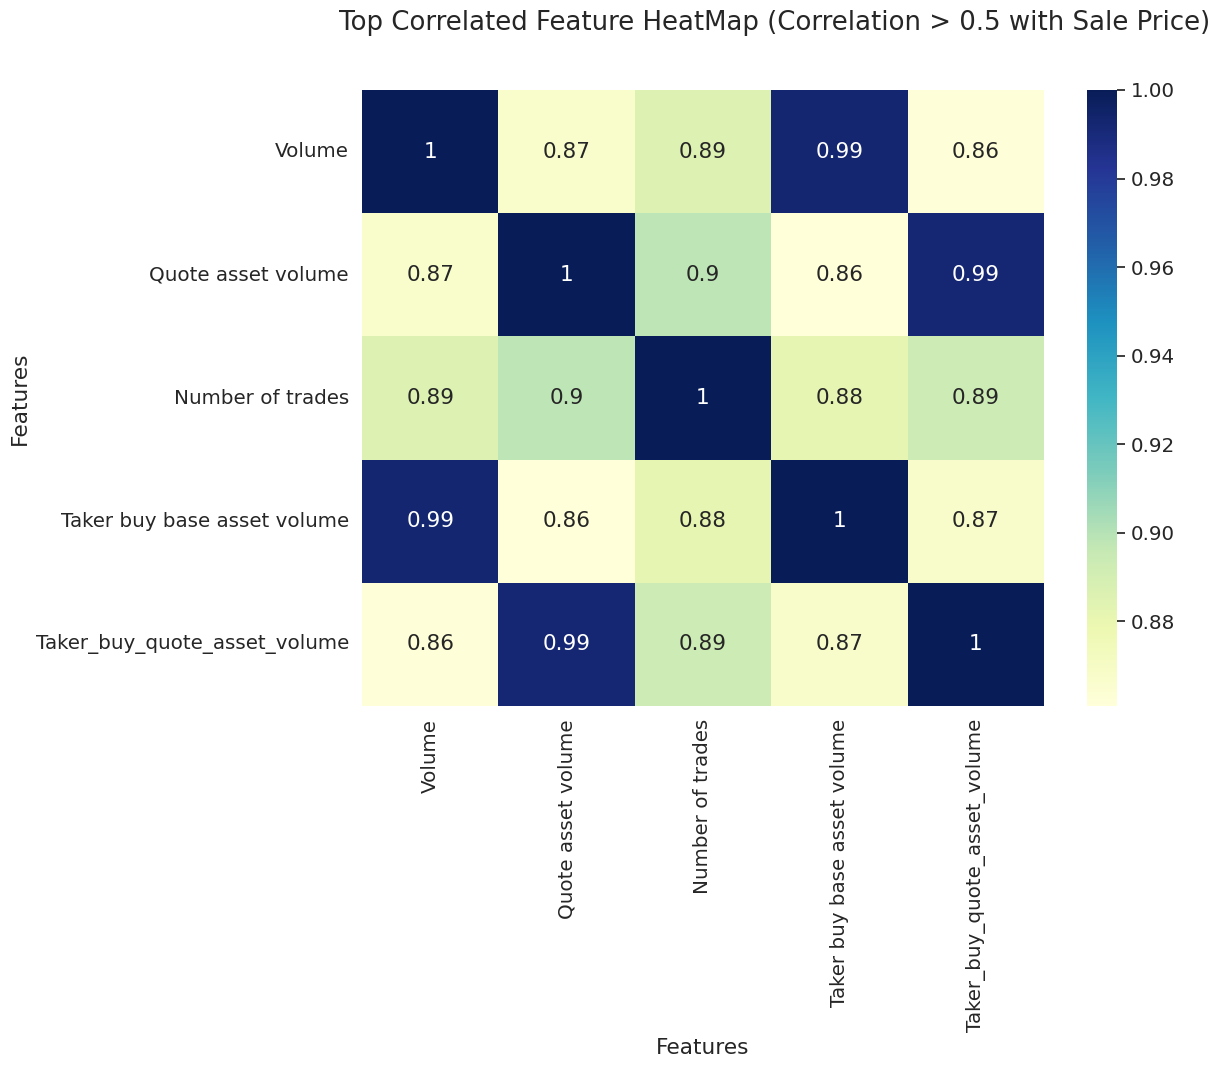

In [ ]:
# most correlated features
df_train_numeric = df_train.select_dtypes(include=[float, int])
corr_mat = df_train_numeric.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["Taker_buy_quote_asset_volume"])>0.5]
g = sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

In [ ]:
print("Correlation Values")


df_train_numeric = df_train.select_dtypes(include=[float, int])
corr = df_train_numeric.corr().drop('Taker_buy_quote_asset_volume')
corr.sort_values(["Taker_buy_quote_asset_volume"], ascending = False, inplace = True)
print(corr.Taker_buy_quote_asset_volume)

Correlation Values
Quote asset volume             0.991928
Number of trades               0.893257
Taker buy base asset volume    0.867637
Volume                         0.861519
High                           0.277666
Close                          0.276037
Open                           0.275760
Low                            0.273974
Ignore                              NaN
Name: Taker_buy_quote_asset_volume, dtype: float64


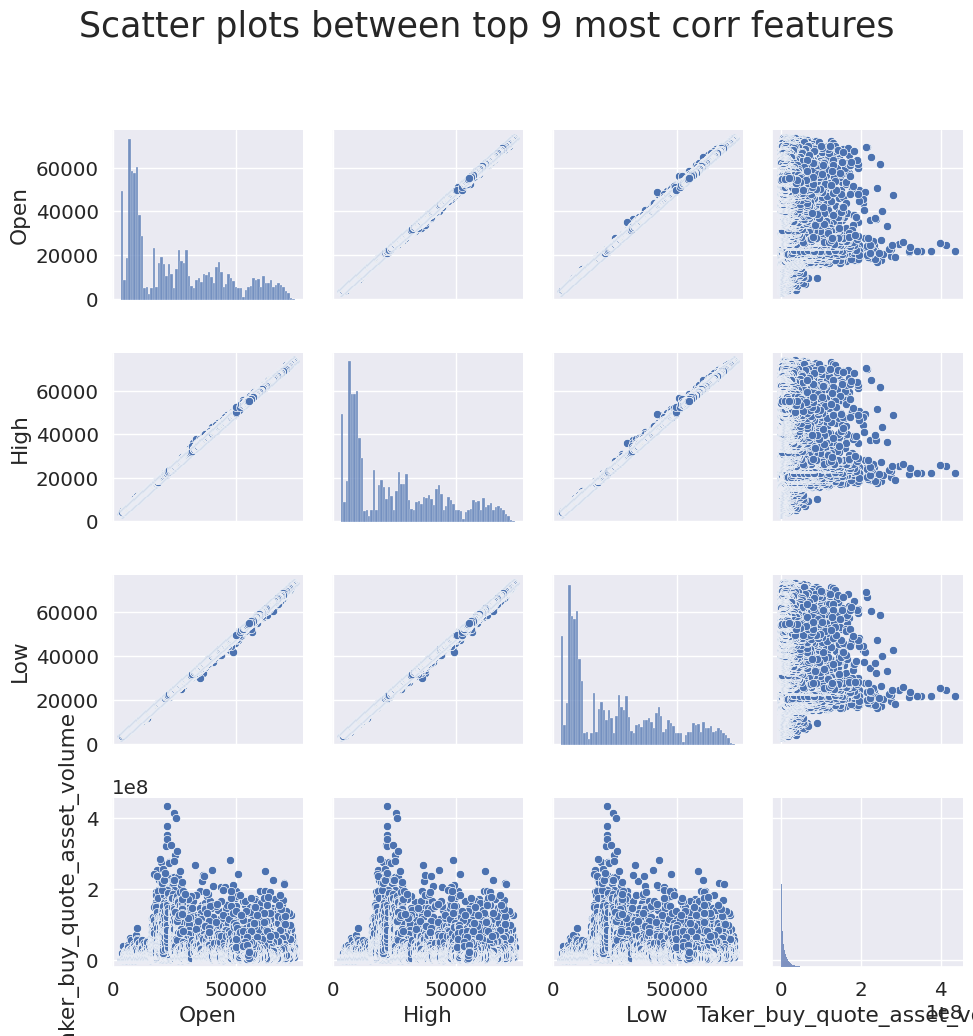

In [ ]:
rcParams['figure.figsize'] = 5,5
cols = ['Open', 'High', 'Low', 'Taker_buy_quote_asset_volume']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

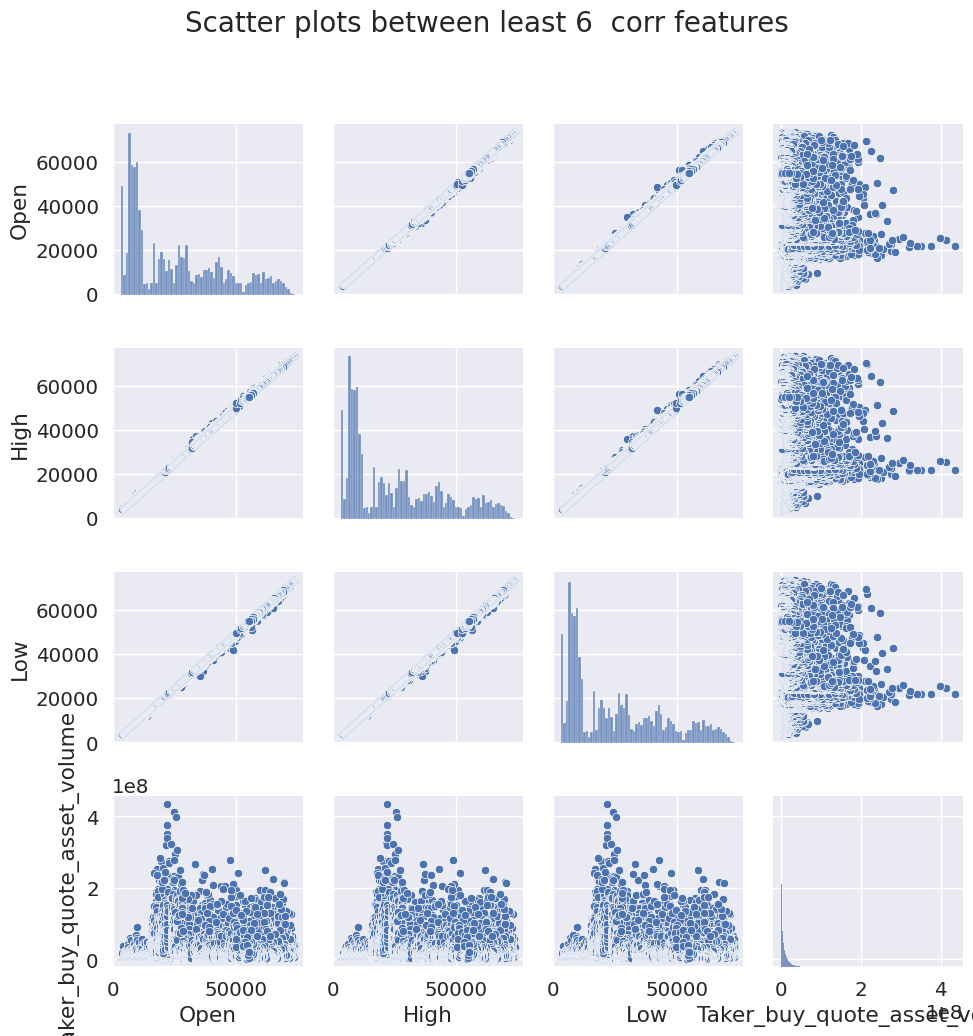

In [ ]:
rcParams['figure.figsize'] = 5,5
cols = ['Open', 'High', 'Low', 'Taker_buy_quote_asset_volume']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)
plt.tight_layout()
plt.show()

In [ ]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['Taker_buy_quote_asset_volume'], edgecolor=edgecolor)
    plt.ylabel('Taker_buy_quote_asset_volume', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and Taker_buy_quote_asset_volume")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

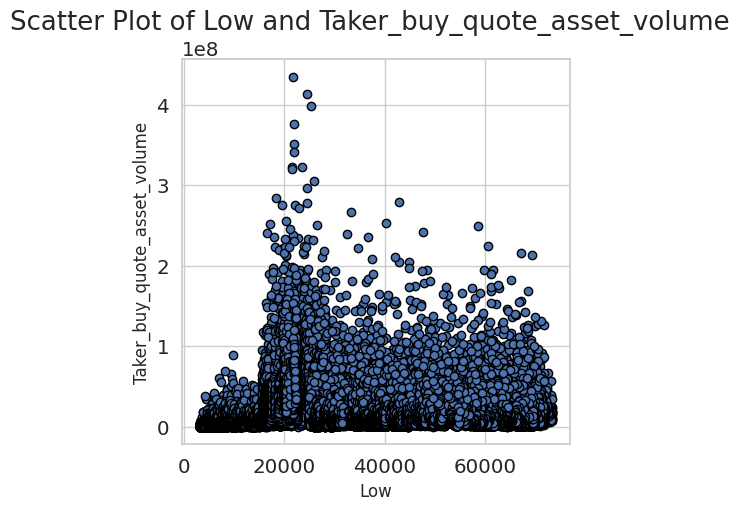

In [ ]:
scatter_plot('Low')

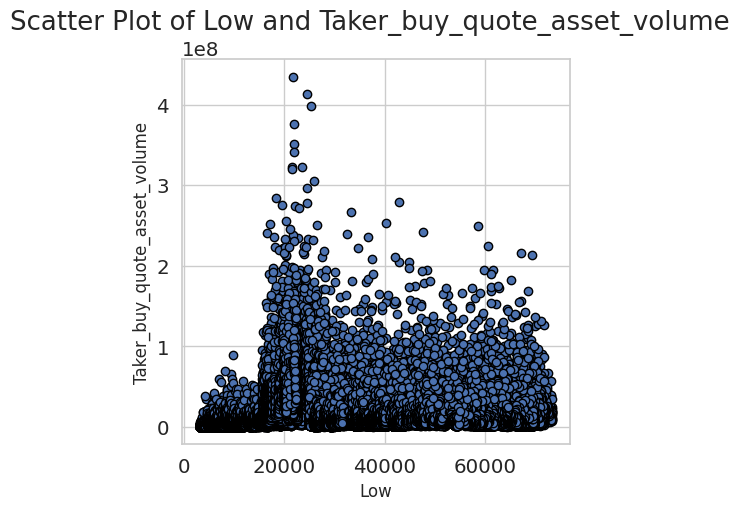

In [ ]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['Low'] > 4000) & ( df_train['Taker_buy_quote_asset_volume']<300000)].index)

#Check the graphic again
scatter_plot('Low')

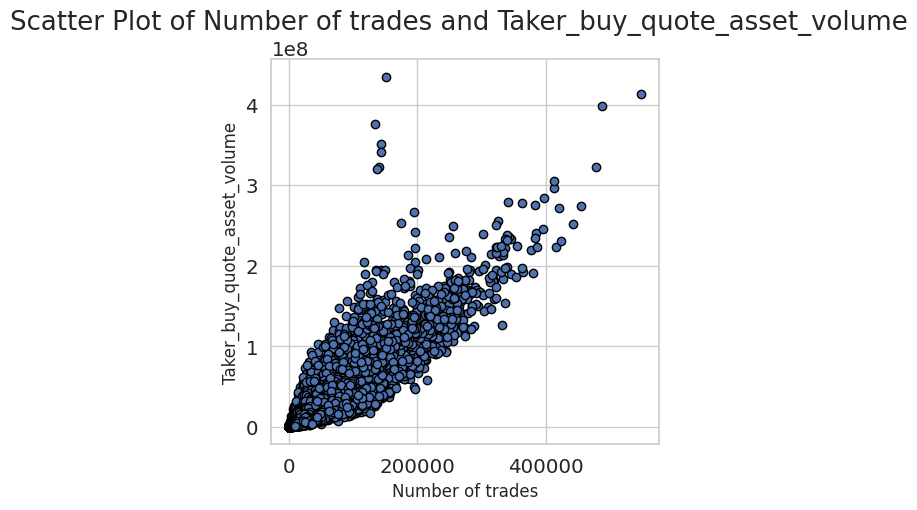

In [ ]:
scatter_plot('Number of trades')

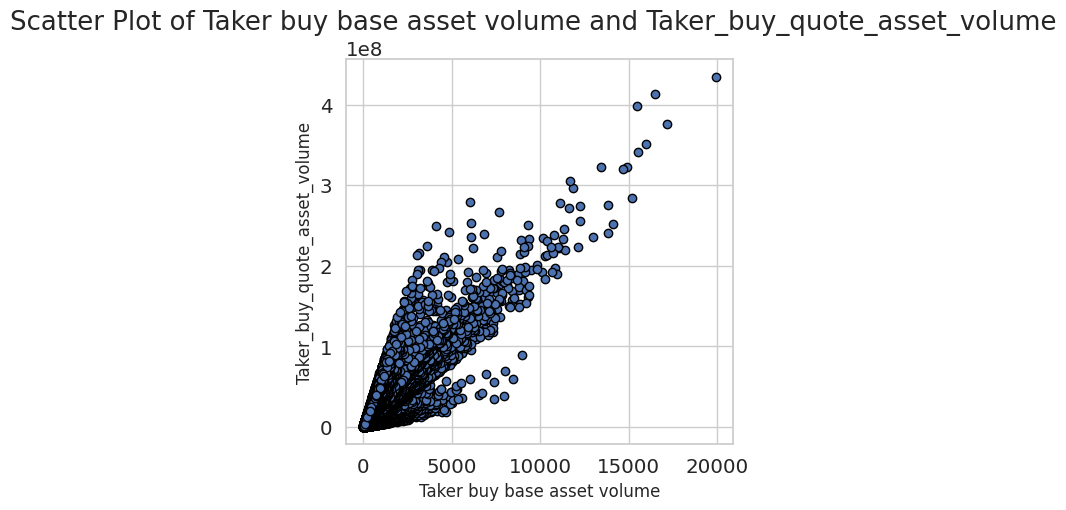

In [ ]:
scatter_plot('Taker buy base asset volume')

In [ ]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["Quote asset volume"], axis=1)  # training features
y_train = train_set["Quote asset volume"].copy()             # training label

X_valid = valid_set.drop(["Quote asset volume"], axis=1)  # testing features
y_valid = valid_set["Quote asset volume"].copy()               # testing label

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))

X_train shape: (161847, 11)
y_train shape: (161847,)

X_valid shape: (69363, 11)
y_valid shape: (69363,)


In [ ]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

0
0


In [ ]:
# Eliminar columnas no numéricas (en este caso, 'Open time' y 'Close time')
X_train = X_train.drop(['Open time', 'Close time'], axis=1, errors='ignore')
X_valid = X_valid.drop(['Open time', 'Close time'], axis=1, errors='ignore')

# Ajustar el modelo con las características numéricas
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_valid)

In [ ]:
y_pred

array([83071597.1594106 , 46055001.71280414, 55761194.69088268, ...,
       11363680.2808746 , 24171874.03984364, 41385961.10659444])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio y el coeficiente de determinación R²
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f'Error cuadrático medio: {mse}')
print(f'R²: {r2}')


Error cuadrático medio: 3920501590433.4004
R²: 0.9972811306021775


In [ ]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):

    fig = plt.figure(figsize=(15,15))
    fig, ax = plt.subplots()

    ax.scatter(y_train, y_pred,color = "red",edgecolor = 'blue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

<Figure size 1500x1500 with 0 Axes>

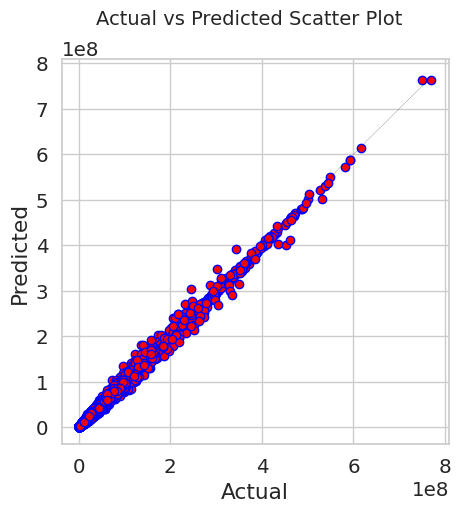

In [ ]:
actual_vs_pred_plot(y_valid,y_pred)

In [ ]:
# prompt: overfitting

# Calculate the cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation score:", cv_scores.std())

# If the training score is significantly higher than the cross-validation score, it indicates overfitting.


Cross-validation scores: [0.74436777 0.90326903 0.89877017 0.98661068 0.99110444]
Mean cross-validation score: 0.9048244195574384
Standard deviation of cross-validation score: 0.0893517138747118
